## Bayesian Structural Time Series Model for Stock Price Prediction

#### Team Members:
- Asteria Xu (56376452)
- Yufei Shen (29116514)

#### Introduction:
Financial time series forecasting plays an important role in supporting data-driven decision making for traders. Due to the inherent non-stationarity and volatility in financial markets, stock price prediction is one of the most challenging tasks in this area. In this project, we aim to forecast the closing price of TESLA using the TSLA stock dataset (https://www.kaggle.com/datasets/varpit94/tesla-stock-data-updated-till-28jun2021), which is obtained from Kaggle and contains 7 variables related to stock from 2010 to 2022. The stock is an ideal test case for assessing the flexibility and robustness of Bayesian methods versus frequentist methods.

Our analysis will only focus on the most recent 12-month period to evaluate the short-term forecasting performance of  the Bayesian Structural Time Series (BSTS) model and the Autoregressive Integrated Moving Average (ARIMA) model. The ARIMA model is the cornerstone of classical time series analysis. It models time dependence through differencing and autocorrelation modelling, which is particularly effective for static processes. However, its linearity and constant variance assumptions can limit its effectiveness when applied to highly volatile financial data. On the other hand, the BSTS model employs a Bayesian state-space framework to decompose the observed series into latent components such as trend and seasonality effects, which is beneficial when combining prior knowledge and explicitly modeling uncertainty. It has been used in several real-world applications, including Google's forecasting tool, and is known for generating well-calibrated forecasts, even in the presence of model misspecification. This study contributes to the broader discussion of Bayesian and frequency methods in time series modeling by comparing the forecasting performance and uncertainty quantification of these two models in the dynamic real world. 

#### Methods
First, we will load and preprocess the data, including converting dates to proper `Date` objects and the closing prices to numeric format. The data will be sorted chronologically, and a 12-month window will be extracted for modeling. We will create a univariate time series object with daily frequency, assuming 252 trading days per year. We will then split the time series into training and testing sets, using the first 90% of the data for training (approximately 10 months) and the remaining 10% for testing (around 2 months).

#### ARIMA:
As a frequency benchmark, we will fit an ARIMA model using the `auto.arima()` function from the `forecast` package. The model is automatically selected by minimizing the AICc of different orders of the autoregressive, difference and moving average terms. We will disable stepwise selection and approximation for a more exhaustive search. Predictions for the test period will be generated, including 95% confidence intervals.

#### BSTS (bsts package):
Mis-specification can occur when omitting important structures (e.g., using only a trend when the data has weekly effects). In this case, we will fit another BSTS model using the `bsts` package. This model includes a local linear trend component and a seasonal component with 5 seasons to reflect weekly seasonality across a typical trading year. Priors for the level, slope and seasonal components will be specified using `SdPrior()` with a prior guess for the standard deviation set to 1 and a small sample size. The model is formulated below:

y_t ~ N(µ_t , 2)

µ_t = µ_(t-1) + β_(t-1) + η_t

β_t = β_(t-1) + ε_t

where y_t is the closing price, µ_t is the local level, and β_t is the local trend. The model will be estimated using MCMC sampling for 1,500 iterations, with the first 500 iterations discarded as burn-in. Forecasts for the test period will be obtained using the `predict` function, and the posterior distribution will include point estimates and 95% credible intervals.

Finally, we will evaluate the models using three metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE) and coverage. For each model, predicted means and interval bounds will be extracted, and scores will be computed by comparing predictions to the test set. We will also visualize predicted series from BSTS and ARIMA against the full time series to compare model behavior, which will provide insight into how well each model captured recent trends and volatility in TSLA stock prices.

#### Results
#### ARIMA & BSTS (bsts package):

The evaluation metrics reveal that the BSTS package model outperforms the ARIMA model in terms of prediction accuracy. As shown in plot 4, the BSTS package model achieves a lower MAE of 64.81 and a RMSE  of 77.06, compared to ARIMA’s MAE of 89.69 and RMSE of 99.77. These results indicate that the BSTS package model not only makes smaller errors on average, but is also less prone to large deviations, and therefore has better accuracy and reliability in fluctuating situations. Additionally, the BSTS package model achieves perfect 95% interval coverage, while ARIMA falls slightly short with a coverage rate of 96.15%. This suggests that the BSTS package model produces wider predictive intervals that fully capture the observed values, reflecting a greater degree of model uncertainty. In contrast, ARIMA yields tighter intervals that may under-cover true observations, making it less reliable under uncertainty.

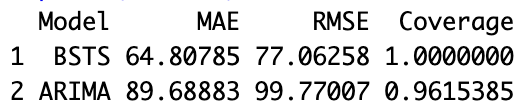

In [3]:
library(IRdisplay)
display_png(file = "plot 4.png")

From plot 5, we can see that both models are able to track the general trend in Tesla’s closing prices, but the BSTS package model (blue line) demonstrates greater adaptability to local changes in trend, likely due to its decomposition of time series components and use of Bayesian updating.

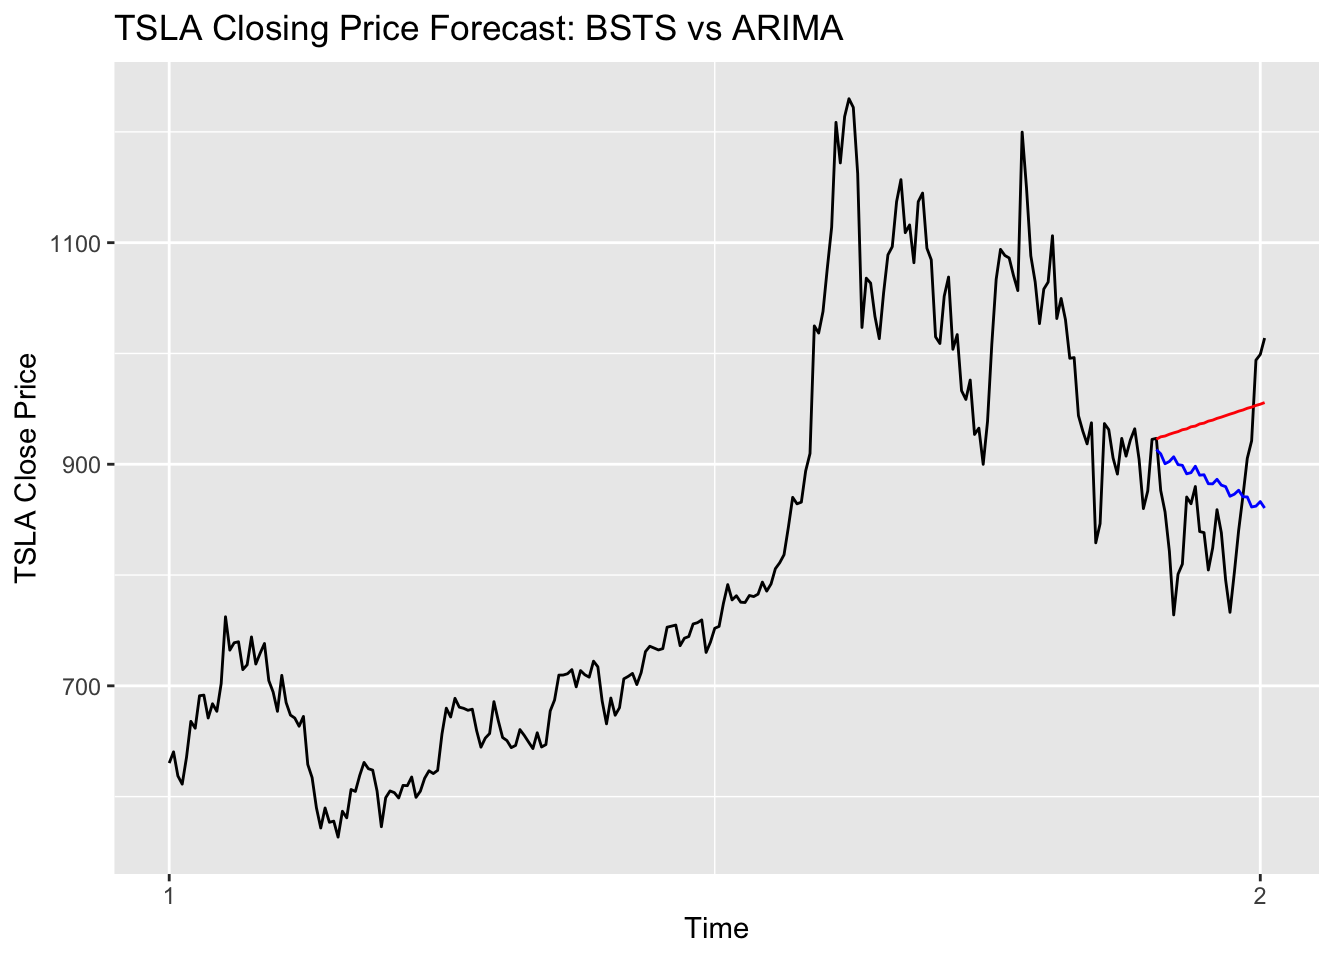

In [4]:
display_png(file = "plot 5.png")

The calibration plot visualizes how well the BSTS package model’s 95% credible intervals capture the actual observed values. As seen in Plot 6, the blue shaded region represents the forecast interval, which widens over time to reflect increasing uncertainty in longer-term predictions. Most of the actual observations fall within this region, indicating that the model is reasonably well-calibrated. However, the presence of several red dots, particularly toward near the right end of the forecast horizon, suggests that the model underestimates an upward trend in Tesla's stock price. 

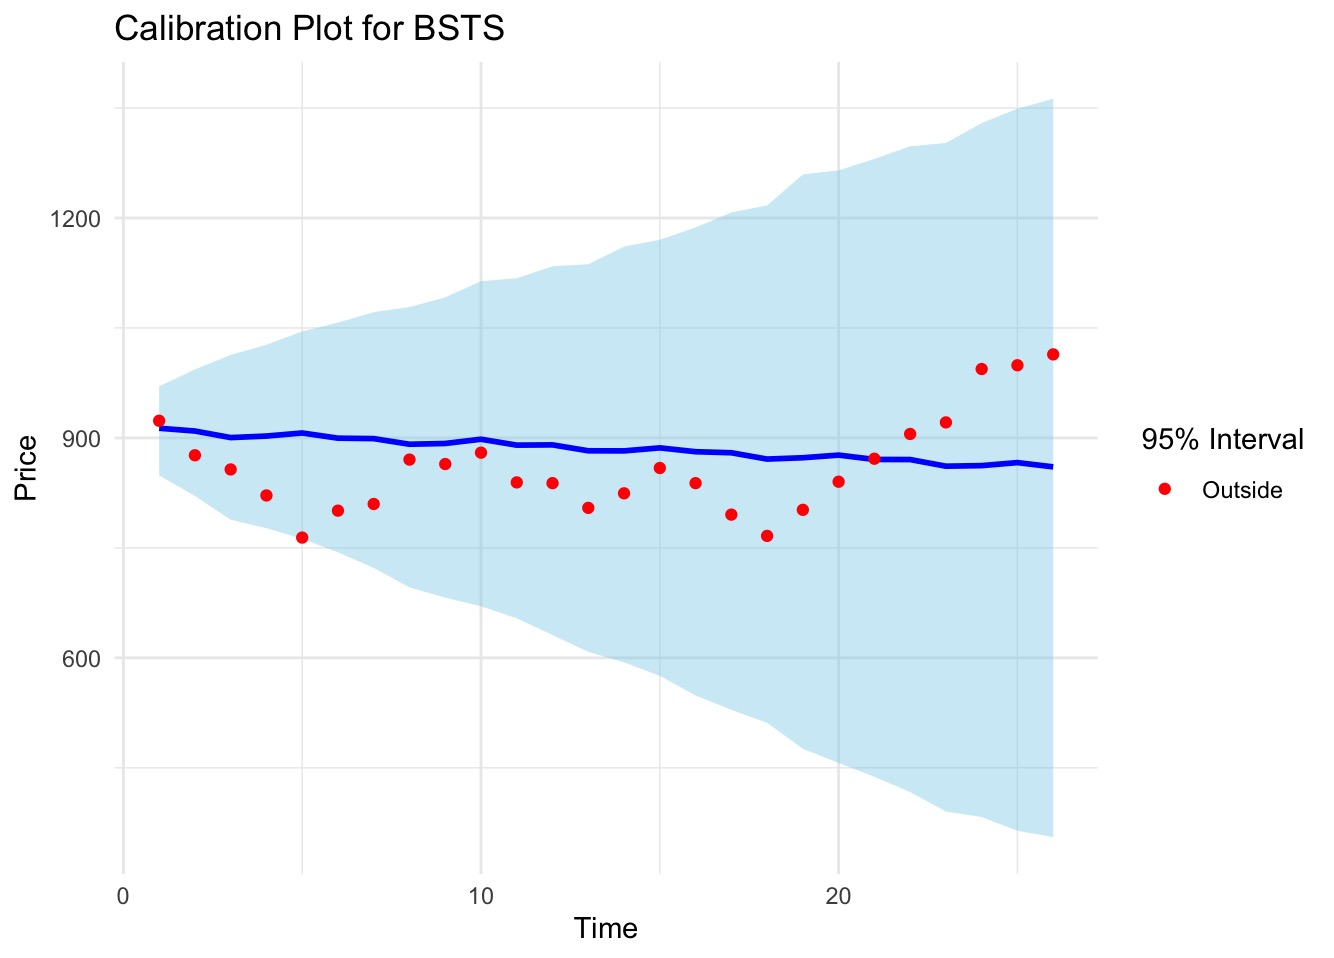

In [6]:
display_png(file = "plot 6.jpeg")

#### Discussion:
ARIMA is well-suited for stationary time series and can capture general trends, but it tends to struggle with non-stationary dynamics or evolving structures such as seasonal changes. In contrast, the BSTS package model offers a Bayesian framework that flexibly incorporates latent trends and seasonal structure. It has the lowest MAE and RMSE in the comparison, making it effective for modeling financial data that is volatile over time, such as Tesla's stock price. Additionally, it produces a full posterior distribution, enabling richer insights into forecast uncertainty beyond point estimates. The coverage metrics show that the prediction intervals of the BSTS package model are better calibrated than the prediction intervals of the ARIMA model, which highlights the strength of Bayesian inference in capturing uncertainty, even under model mis-specification or volatility conditions.

While the BSTS package model performs well overall, its occasional failures to capture rapid structural changes may affect its predictive reliability in highly volatile markets. This could result from limitations in the model structure or omitted explanatory variables. For future work, the BSTS model could be enhanced by incorporating additional regressors such as market sentiment to better capture price dynamics. Adjusting seasonal components and integrating time-varying priors could also improve the model’s adaptability to rapid market shifts.

#### Reference:
